<a href="https://colab.research.google.com/github/azii22000/DeepLearning-01/blob/main/LRFinder_Hoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/Alireza-Akhavan/tf2-tutorial/raw/master/callbacks/learningratefinder.py
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset.py
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-11-26 08:49:41--  https://github.com/Alireza-Akhavan/tf2-tutorial/raw/master/callbacks/learningratefinder.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py [following]
--2023-11-26 08:49:41--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py.1’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2023-11-26 08:49:41 (57.2 MB/s) - ‘lear

In [56]:
from learningratefinder import LearningRateFinder

In [57]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense


import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dataset import load_hoda

In [58]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [59]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [60]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

In [61]:
x_train = x_train_original.reshape(1000,5,5)
x_test  = x_test_original.reshape(200,5,5)
y_train = y_train_original.reshape(1000,)
y_test  = y_test_original.reshape(200,)

In [62]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(5, 5)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [63]:
MIN_LR = 1e-5

model = create_model()
opt   = keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/64
32/32 [==============================] - 1s 4ms/step - loss: 85.5667 - accuracy: 0.1680
Epoch 2/64
32/32 [==============================] - 0s 4ms/step - loss: 84.2928 - accuracy: 0.1590
Epoch 3/64
32/32 [==============================] - 0s 4ms/step - loss: 84.0131 - accuracy: 0.1630
Epoch 4/64
32/32 [==============================] - 0s 4ms/step - loss: 84.2846 - accuracy: 0.1640
Epoch 5/64
32/32 [==============================] - 0s 4ms/step - loss: 84.5512 - accuracy: 0.1750
Epoch 6/64
32/32 [==============================] - 0s 4ms/step - loss: 85.1142 - accuracy: 0.1810
Epoch 7/64
32/32 [==============================] - 0s 4ms/step - loss: 82.5903 - accuracy: 0.1630
Epoch 8/64
32/32 [==============================] - 0s 4ms/step - loss: 84.0664 - accuracy: 0.1730
Epoch 9/64
32/32 [==============================] - 0s 4ms/step - loss: 83.1929 - accuracy: 0.1790
Epoch 10/64
32/32 [==============================] - 0s 4ms/step - loss: 84.1536 - accuracy: 0.1820
Epoch 11/

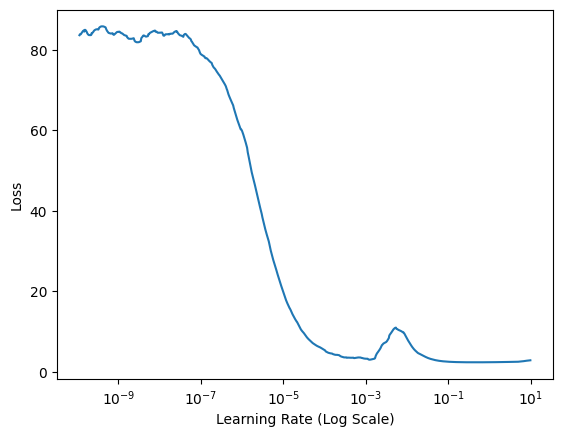

In [64]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()

بر مبنای  گراف بالا, مقدار لرنینگ ریت در شیب نزولی متاسب می باشد.
best Lr = 1e-7 - 1e-5 bold text